#Outil de création d'une frise chrolonogique 

In [ ]:
#@title Installation des bibliothèques nécessaires et connexion à un compte Google Drive.

''' 
Google Colab notebook.
Python == 3.7.11

BaOIA - La Contemporaine - Université de Nanterre
'''


## Installation des bibliothèques et connexion au compte Google Drive



import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import urllib.request
import json

from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/romans_scolaires/

Mounted at /content/drive/
/content/drive/My Drive/romans_scolaires


In [ ]:

    names = ['La Petite Jeanne ou le devoir', 'Le Tour de France par deux enfants', 
             "Les Causeries d'un grand-père", 'Les étapes dun petit algérien', 'Moussa et Gi-Gla',
             'Les Biens de la terre', 'Tu sera ouvrière', 'Le ménage de Mme Sylvain','Le Tour de leurope pendant la guerre',
             'Le tour de France par deux enfants', 'Maurice ou le travail', 'Francinet, livre de lecture', 'Madame Adeline',
             'Les enfants de marcel', 'La France en. zig-zag', 'Tu seras soldat', 'Cour moyen et supérieur', 'Simon de Nantua',
             'Petit Pierre', 'Tu seras citoyen', 'Jean Lavenir: éducation', 'Suzette, livre de lecture courante']

    dates = ['1884', '1951', '1894',
             '1913', '1916', '1879', '1892',
             '1918', '1916', '1878', '1853',
             '1885', '1871', '1893', '1894',
             '1887', '1901', '1880', '1859',
             '1892', '1904', '1888']

    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]


TypeError: ignored

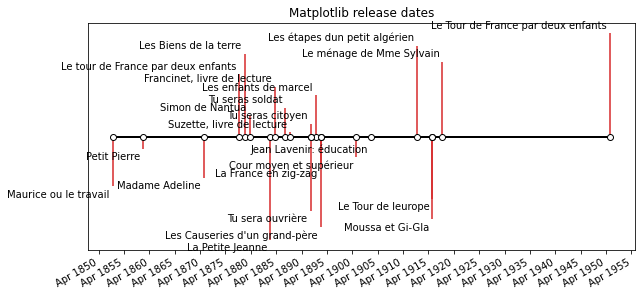

In [ ]:

# Choose some nice levels
names = ['La Petite Jeanne', 'Le Tour de France par deux enfants', 
             "Les Causeries d'un grand-père", 'Les étapes dun petit algérien', 'Moussa et Gi-Gla',
             'Les Biens de la terre', 'Tu sera ouvrière', 'Le ménage de Mme Sylvain','Le Tour de leurope',
             'Le tour de France par deux enfants', 'Maurice ou le travail', 'Francinet, livre de lecture', 'Madame Adeline',
             'Les enfants de marcel', 'La France en zig-zag', 'Tu seras soldat', 'Cour moyen et supérieur', 'Simon de Nantua',
             'Petit Pierre', 'Tu seras citoyen', 'Jean Lavenir: éducation', 'Suzette, livre de lecture']

dates = ['1884-01-01', '1951-01-01', '1894-01-01',
             '1913-01-01', '1916-01-01', '1879-01-01', '1892-01-01',
             '1918-01-01', '1916-01-01', '1878-01-01', '1853-01-01',
             '1885-01-01', '1871-01-01', '1893-01-01', '1894-01-01',
             '1887-01-01', '1901-01-01', '1880-01-01', '1859-01-01',
             '1892-01-01', '1904-01-01', '1888-01-01']

dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]
levels = np.tile([-25, 25, -22, 22, -20, 20, -18, 18, -15, 15, -12, 12, -10, 10, -7, 7, -5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Matplotlib release dates")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=60))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
plt.savefig('frise_chro.png')

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()

plt.write_html("frise_chro.html")